In [1]:
# !pip install opendatasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import tensorflow.keras.backend as K
import random

In [2]:
od.download('https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting/data')

Skipping, found downloaded files in "./godaddy-microbusiness-density-forecasting" (use force=True to force download)


In [3]:
import os
os.chdir('godaddy-microbusiness-density-forecasting')

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_census_starter = pd.read_csv('census_starter.csv')
df_train.info()
df_test.info()
df_census_starter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              25080 non-null  object
 1   cfips               25080 non-null  int64 
 2   first_day_of_month  25080 non-null  object
dty

In [5]:
df_train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
df_train[df_train['first_day_of_month']=='2019-08-01']

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
39,1003_2019-08-01,1003,Baldwin County,Alabama,2019-08-01,7.239156,11464
78,1005_2019-08-01,1005,Barbour County,Alabama,2019-08-01,1.073138,222
117,1007_2019-08-01,1007,Bibb County,Alabama,2019-08-01,1.310777,234
156,1009_2019-08-01,1009,Blount County,Alabama,2019-08-01,1.544148,681
...,...,...,...,...,...,...,...
122070,56037_2019-08-01,56037,Sweetwater County,Wyoming,2019-08-01,2.640386,860
122109,56039_2019-08-01,56039,Teton County,Wyoming,2019-08-01,26.433363,4887
122148,56041_2019-08-01,56041,Uinta County,Wyoming,2019-08-01,4.612016,674
122187,56043_2019-08-01,56043,Washakie County,Wyoming,2019-08-01,2.603246,162


In [7]:
df_cfips_pivot = pd.pivot_table(df_train, values='microbusiness_density', index='first_day_of_month', columns='cfips')
for i in range(0, len(df_cfips_pivot.columns)):
    df_cfips_pivot.iloc[:,i].interpolate(inplace = True)
df_cfips_pivot.reset_index(inplace=True)
df_cfips_pivot['first_day_of_month'] = pd.to_datetime(df_cfips_pivot['first_day_of_month'])

In [8]:
df_cfips_pivot

cfips,first_day_of_month,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,2019-08-01,3.007682,7.239156,1.073138,1.310777,1.544148,0.926372,0.674981,2.691544,1.486542,...,1.150575,5.916088,4.062681,30.183279,6.115724,2.640386,26.433363,4.612016,2.603246,1.548594
1,2019-09-01,2.884870,7.290936,0.995794,1.305176,1.575892,0.998556,0.739265,2.703752,1.355156,...,1.150575,5.894528,3.888567,31.712736,6.142085,2.858371,26.611856,4.338306,2.683593,1.530794
2,2019-10-01,3.055843,7.425439,1.160149,1.254761,1.546415,0.974495,0.713551,2.693764,1.355156,...,1.150575,5.881592,3.903076,31.990431,6.181626,2.913635,26.736261,4.420419,2.635385,1.530794
3,2019-11-01,2.993233,7.426071,1.000628,1.254761,1.573625,1.022618,1.054256,2.739270,1.362664,...,1.200600,5.954897,3.845038,32.776520,6.234348,3.008812,26.920164,4.372520,2.683593,1.601994
4,2019-12-01,2.993233,7.470274,1.000628,1.265965,1.555485,1.034649,1.054256,2.729281,1.343894,...,1.200600,5.911776,3.845038,32.806427,6.273890,3.088637,26.903938,4.310935,2.635385,1.584194
5,2020-01-01,2.969090,7.413655,1.027229,1.253638,1.573217,1.060717,1.060871,2.719628,1.319910,...,1.218893,5.901441,3.890260,32.847649,6.353848,3.150922,26.684565,4.367864,2.666882,1.590706
6,2020-02-01,2.909326,7.282522,1.022314,1.248041,1.536999,1.036333,1.060871,2.745211,1.331096,...,1.269680,5.871155,3.716069,32.246933,6.486774,3.169494,26.738255,4.237172,2.699208,1.519214
7,2020-03-01,2.933231,7.309610,1.032144,1.264831,1.541526,1.060717,1.009121,2.756335,1.301268,...,1.269680,5.897114,3.527362,32.856171,7.018477,3.237588,26.668457,4.182143,2.699208,1.537087
8,2020-04-01,3.000167,7.568799,1.086209,1.270428,1.577744,1.011948,0.996183,2.818625,1.327368,...,1.269680,5.979319,3.469299,34.142807,6.965306,3.293302,27.119463,4.195900,2.683045,1.554960
9,2020-05-01,3.004948,7.603275,1.081294,1.287217,1.575481,0.890027,0.996183,2.834197,1.342282,...,1.320467,6.005279,3.483815,40.916836,7.257743,3.311873,27.414764,4.443527,2.731534,1.608579


In [9]:
cfips_list = [i for i in df_cfips_pivot.columns if i != 'first_day_of_month']
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_cfips_pivot[cfips_list])

In [10]:
def split_sequence(sequence, look_back, forecast_horizon):
    X, y = list(), list()
    for i in range(len(sequence)):
        lag_end = i + look_back
        forecast_end = lag_end + forecast_horizon
        if forecast_end > len(sequence):
             break
        seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [11]:
LOOK_BACK = 12
FORECAST_RANGE = 1
n_features = len(cfips_list)
X_train, y_train = split_sequence(scaled_train, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
print(X_train.shape)
print(y_train.shape)

(27, 12, 3135)
(27, 1, 3135)


In [12]:
def inverse_transform(y_test, yhat):
    y_test_reshaped = y_test.reshape(-1, y_test.shape[-1])
    yhat_reshaped = yhat.reshape(-1, yhat.shape[-1])
    yhat_inverse = scaler.inverse_transform(yhat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)
    return yhat_inverse, y_test_inverse

def evaluate_forecast(y_test_inverse, yhat_inverse):
    mse_ = tf.keras.losses.MeanSquaredError()
    mae_ = tf.keras.losses.MeanAbsoluteError()
    mape_ = tf.keras.losses.MeanAbsolutePercentageError()
    mae = mae_(y_test_inverse,yhat_inverse)
    print('mae:', mae)
    mse = mse_(y_test_inverse,yhat_inverse)
    print('mse:', mse)
    mape = mape_(y_test_inverse,yhat_inverse)
    print('mape:', mape)

In [13]:
import keras.backend as K
def smape_loss(true,predicted):
    epsilon = 0.1
    summ = K.maximum(K.abs(true) + K.abs(predicted) + epsilon, 0.5 + epsilon)
    smape = K.abs(predicted - true) / summ * 2.0
    return smape

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='swish'), input_shape=(LOOK_BACK, n_features)),
    tf.keras.layers.RepeatVector(FORECAST_RANGE),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(80, activation='swish', return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(80, activation='swish', return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features)),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss=smape_loss
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               2588800   
 al)                                                             
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 200)            0         
 r)                                                              
                                                                 
 bidirectional_1 (Bidirecti  (None, 1, 160)            179840    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 1, 160)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 1, 160)            154240    
 onal)                                                  

In [15]:
# callback = tf.keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train,
                    y_train,
                    epochs = 1000,
                    batch_size = 32,
                    verbose = 1)

Epoch 1/1000
1/1 [==============================] - 19s 19s/step - loss: 1.2463
Epoch 2/1000
1/1 [==============================] - 0s 143ms/step - loss: 1.2459
Epoch 3/1000
1/1 [==============================] - 0s 150ms/step - loss: 1.2456
Epoch 4/1000
1/1 [==============================] - 0s 144ms/step - loss: 1.2452
Epoch 5/1000
1/1 [==============================] - 0s 158ms/step - loss: 1.2448
Epoch 6/1000
1/1 [==============================] - 0s 142ms/step - loss: 1.2444
Epoch 7/1000
1/1 [==============================] - 0s 153ms/step - loss: 1.2441
Epoch 8/1000
1/1 [==============================] - 0s 146ms/step - loss: 1.2437
Epoch 9/1000
1/1 [==============================] - 0s 153ms/step - loss: 1.2433
Epoch 10/1000
1/1 [==============================] - 0s 155ms/step - loss: 1.2429
Epoch 11/1000
1/1 [==============================] - 0s 149ms/step - loss: 1.2425
Epoch 12/1000
1/1 [==============================] - 0s 148ms/step - loss: 1.2421
Epoch 13/1000
1/1 [=======

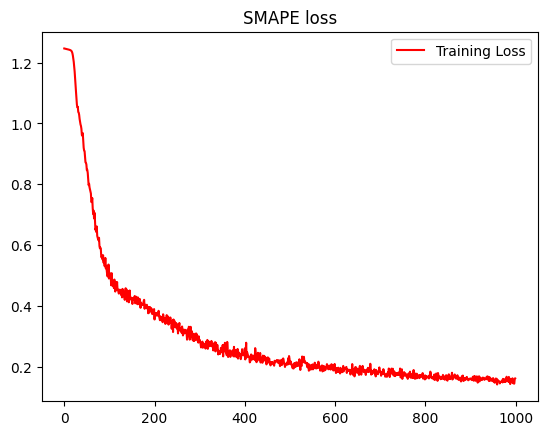

In [16]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('SMAPE loss')
plt.legend()

plt.show()

In [17]:
yhat = model.predict(X_train, verbose=0)
yhat_inverse, y_val_inverse = inverse_transform(y_train, yhat)
evaluate_forecast(y_val_inverse, yhat_inverse)

mae: tf.Tensor(0.09253312, shape=(), dtype=float32)
mse: tf.Tensor(2.479128, shape=(), dtype=float32)
mape: tf.Tensor(29927.834, shape=(), dtype=float32)


In [18]:
data_test = scaled_train[-12:]
print('old shape : ', data_test.shape)
data_test = data_test.reshape((1,) + data_test.shape)
print('new shape : ', data_test.shape)

old shape :  (12, 3135)
new shape :  (1, 12, 3135)


In [19]:
time_test = df_test['first_day_of_month'].unique()
yhat_test_pred = np.empty((0,1,3135))

for i in range(len(time_test)) :
    yhat_pred = model.predict(data_test)
    yhat_test_pred = np.append(yhat_test_pred, yhat_pred, axis=0)
    data_test = np.concatenate((data_test, yhat_pred), axis=1)
    data_test = data_test[:,1:,:]

yhat_test_pred = yhat_test_pred.reshape(-1, yhat_test_pred.shape[-1])
yhat_test_pred = scaler.inverse_transform(yhat_test_pred)

1/1 [==============================] - 0s 53ms/step


In [20]:
prediction = []
for i in yhat_test_pred :
    for j in i.tolist() :
        prediction.append(j)

In [21]:
df_prediction = pd.DataFrame(data={'row_id':df_test['row_id'], 'first_day_of_month':df_test['first_day_of_month'], 'microbusiness_density':prediction})
df_prediction

,row_id,first_day_of_month,microbusiness_density
0,1001_2022-11-01,2022-11-01,3.396848
1,1003_2022-11-01,2022-11-01,8.326051
2,1005_2022-11-01,2022-11-01,1.192292
3,1007_2022-11-01,2022-11-01,1.299039
4,1009_2022-11-01,2022-11-01,1.797549
...,...,...,...
25075,56037_2023-06-01,2023-06-01,2.735706
25076,56039_2023-06-01,2023-06-01,26.027480
25077,56041_2023-06-01,2023-06-01,4.087372
25078,56043_2023-06-01,2023-06-01,3.132379


In [22]:
time_test = df_prediction['first_day_of_month'].unique()
prediction_data = []
for i in time_test :
    prediction_month = [i]
    df_group = df_prediction[df_prediction['first_day_of_month']==i]
    prediction_month.extend(df_group['microbusiness_density'].values)
    prediction_data.append(prediction_month)

In [23]:
df2 = pd.DataFrame(prediction_data, columns=df_cfips_pivot.columns)
df2['first_day_of_month'] = pd.to_datetime(df2['first_day_of_month'])
df_final = df_cfips_pivot.copy()
df_final = df_final._append(df2, ignore_index = True)
df_final

cfips,first_day_of_month,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,2019-08-01,3.007682,7.239156,1.073138,1.310777,1.544148,0.926372,0.674981,2.691544,1.486542,...,1.150575,5.916088,4.062681,30.183279,6.115724,2.640386,26.433363,4.612016,2.603246,1.548594
1,2019-09-01,2.884870,7.290936,0.995794,1.305176,1.575892,0.998556,0.739265,2.703752,1.355156,...,1.150575,5.894528,3.888567,31.712736,6.142085,2.858371,26.611856,4.338306,2.683593,1.530794
2,2019-10-01,3.055843,7.425439,1.160149,1.254761,1.546415,0.974495,0.713551,2.693764,1.355156,...,1.150575,5.881592,3.903076,31.990431,6.181626,2.913635,26.736261,4.420419,2.635385,1.530794
3,2019-11-01,2.993233,7.426071,1.000628,1.254761,1.573625,1.022618,1.054256,2.739270,1.362664,...,1.200600,5.954897,3.845038,32.776520,6.234348,3.008812,26.920164,4.372520,2.683593,1.601994
4,2019-12-01,2.993233,7.470274,1.000628,1.265965,1.555485,1.034649,1.054256,2.729281,1.343894,...,1.200600,5.911776,3.845038,32.806427,6.273890,3.088637,26.903938,4.310935,2.635385,1.584194
5,2020-01-01,2.969090,7.413655,1.027229,1.253638,1.573217,1.060717,1.060871,2.719628,1.319910,...,1.218893,5.901441,3.890260,32.847649,6.353848,3.150922,26.684565,4.367864,2.666882,1.590706
6,2020-02-01,2.909326,7.282522,1.022314,1.248041,1.536999,1.036333,1.060871,2.745211,1.331096,...,1.269680,5.871155,3.716069,32.246933,6.486774,3.169494,26.738255,4.237172,2.699208,1.519214
7,2020-03-01,2.933231,7.309610,1.032144,1.264831,1.541526,1.060717,1.009121,2.756335,1.301268,...,1.269680,5.897114,3.527362,32.856171,7.018477,3.237588,26.668457,4.182143,2.699208,1.537087
8,2020-04-01,3.000167,7.568799,1.086209,1.270428,1.577744,1.011948,0.996183,2.818625,1.327368,...,1.269680,5.979319,3.469299,34.142807,6.965306,3.293302,27.119463,4.195900,2.683045,1.554960
9,2020-05-01,3.004948,7.603275,1.081294,1.287217,1.575481,0.890027,0.996183,2.834197,1.342282,...,1.320467,6.005279,3.483815,40.916836,7.257743,3.311873,27.414764,4.443527,2.731534,1.608579


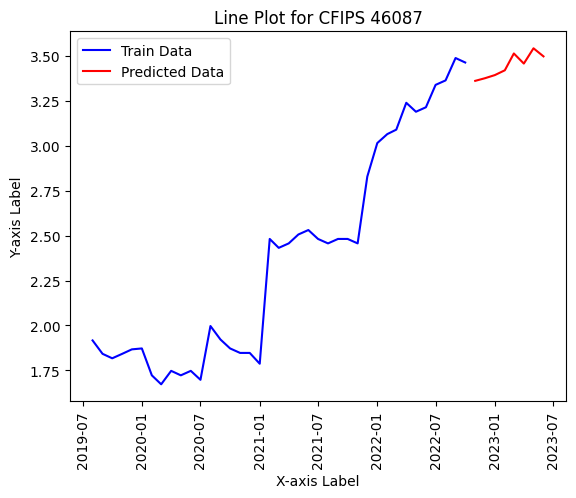

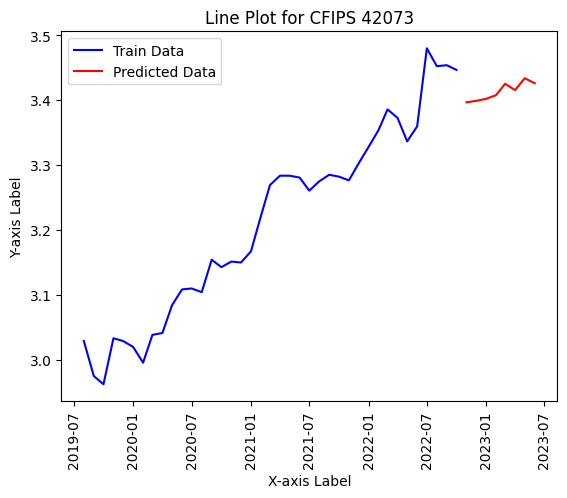

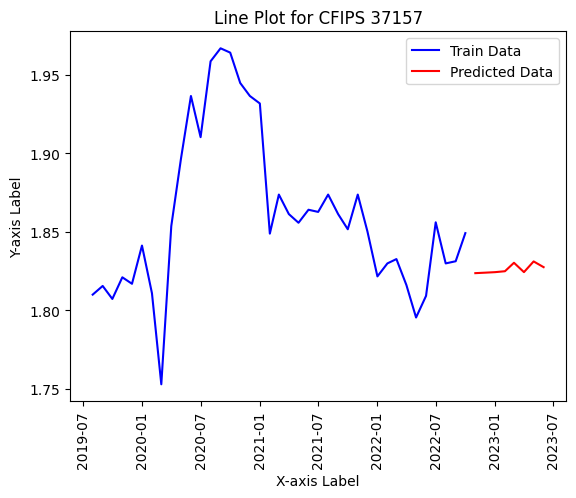

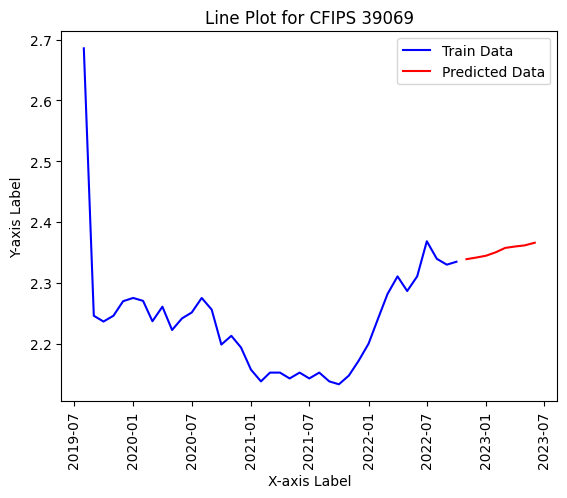

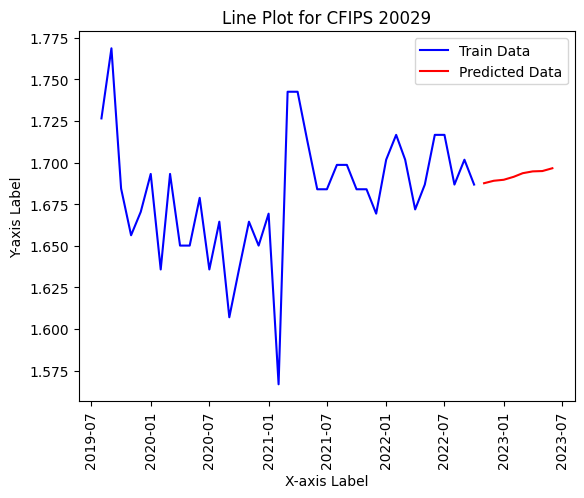

<Figure size 640x480 with 0 Axes>

In [24]:
random_cfips = [random.randint(1, 3136) for _ in range(5)]
random_columns = df_final.columns[random_cfips]

date_data = df_final['first_day_of_month']
for column in random_columns:
    # Plot the train data with red color
    plt.plot(df_final['first_day_of_month'][:-8], df_final[column][:-8], color='blue', label='Train Data')

    # Plot the predicted data with blue color
    plt.plot(df_final['first_day_of_month'][-8:], df_final[column][-8:], color='red', label='Predicted Data')

    # Add labels and title
    plt.xlabel('X-axis Label')
    plt.xticks(rotation=90)
    plt.ylabel('Y-axis Label')
    plt.title(f'Line Plot for CFIPS {column}')

    # Add legend
    plt.legend()
    plt.figure()

# Show the plot
plt.show()